In [1]:
import os
import pandas as pd

# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/Generation/tab_generation_metric_outputs'

# Function to calculate the maximums of the metrics
def calculate_maximums(file_path):
    df = pd.read_csv(file_path)
    maximums = {
        'v2_acc': df['v2_acc'].max(),
        'v4_acc': df['v4_acc'].max(),
        'v10_acc': df['v10_acc'].max(),
        'test_accuracy': df['test_accuracy'].max(),  # TOP1 accuracy
        'top5_acc': df['top5_acc'].max()  # TOP5 accuracy
    }
    return maximums

# Dictionary to store the results
results = {}

# Define the output file name
output_file_name = 'subject_averages.csv'

# Check if the output file already exists and skip it
output_file_path = os.path.join(directory_path, output_file_name)
if os.path.exists(output_file_path):
    os.remove(output_file_path)

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv') and filename != output_file_name:
        # Extract the method name from the filename
        method_name = filename.split('_')[0]
        file_path = os.path.join(directory_path, filename)
        maximums = calculate_maximums(file_path)
        
        # Aggregate the results by method name
        if method_name not in results:
            results[method_name] = {metric: [] for metric in maximums}
        for metric in maximums:
            results[method_name][metric].append(maximums[metric])

# Calculate the average for each method and metric
averages = {method: {metric: sum(values) / len(values) for metric, values in metrics.items()}
            for method, metrics in results.items()}

# Sort the results by method name
sorted_averages = dict(sorted(averages.items()))

# Convert the sorted averages dictionary to a pandas DataFrame for easier CSV output
averages_df = pd.DataFrame.from_dict(sorted_averages, orient='index')

# You may want to include more descriptive column names here
averages_df.columns = ['V2 Accuracy', 'V4 Accuracy', 'V10 Accuracy', 'Test Accuracy', 'Top5 Accuracy']

# Save the DataFrame to a CSV file
averages_df.to_csv(output_file_path, index_label='Method')

print(f"Averages saved to {output_file_path}")

Averages saved to /home/ldy/Workspace/Generation/tab_generation_metric_outputs/subject_averages.csv


/tmp/ipykernel_268621/2680430939.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(methods))


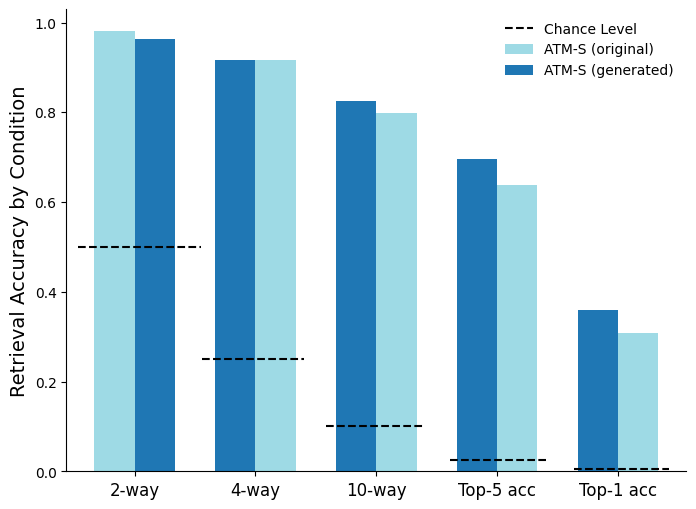

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

output_file_path = "/home/ldy/Workspace/Generation/tab_generation_metric_outputs/subject_averages.csv"

df = pd.read_csv(output_file_path)



new_order = ['Method'] + conditions
df = df[new_order]

# Define the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Extract methods from the DataFrame

# Width of the bars
bar_width = 0.1

# Calculate the number of groups and the total width for each group including the gap
num_conditions = len(conditions)
group_width = (bar_width * (len(methods)+1))  # Total width of a group including the gap

# Adjust the starting index
index = np.arange(num_conditions) * group_width 

# Initialize a color map for methods
colors = plt.cm.get_cmap('tab20', len(methods))
method_colors = {method: colors(i) for i, method in enumerate(methods)}

# Define chance levels for each condition
chance_levels = [0.5, 0.25, 0.1, 0.025, 0.005]  # Adjust according to the new order of conditions if necessary

# Loop to plot the bars for each method and draw chance level lines
for condition_index, condition in enumerate(conditions):
    temp_df = df[['Method', condition]].copy()
    temp_df.sort_values(by=condition, ascending=False, inplace=True)
    
    sorted_values = temp_df[condition].values
    sorted_methods = temp_df['Method'].values
    
    for i, method in enumerate(sorted_methods):
        bar_positions = index[condition_index] + (i * bar_width)
        ax.bar(bar_positions, sorted_values[i], bar_width, color=method_colors[method], label=method if condition_index == 0 else "")
    
    # Draw chance level lines
    offset = 0.025
    group_start = index[condition_index]+offset
    group_end = group_start + (len(methods) * bar_width) + offset

    xmin = group_start / (index[-1] + group_width) +offset*1/(condition_index+10)
    xmax = group_end / (index[-1] + group_width) +offset*1/(condition_index+0.5)

    ax.axhline(y=chance_levels[condition_index], color='black', linestyle='--', 
               label='Chance Level' if condition_index == 0 else "", 
               xmin=xmin, 
               xmax=xmax)

# Hide the top and right border of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', frameon=False)

# Set x-axis labels and ticks
ax.set_xticks(index + (group_width / 2) - (bar_width))
ax.set_xticklabels(conditions, fontsize=12)

ax.set_ylabel('Retrieval Accuracy by Condition', fontsize=14)

# Save and show the plot
fig.savefig("../plots/generated_acc_method_Condition.png", dpi=300)
plt.show()

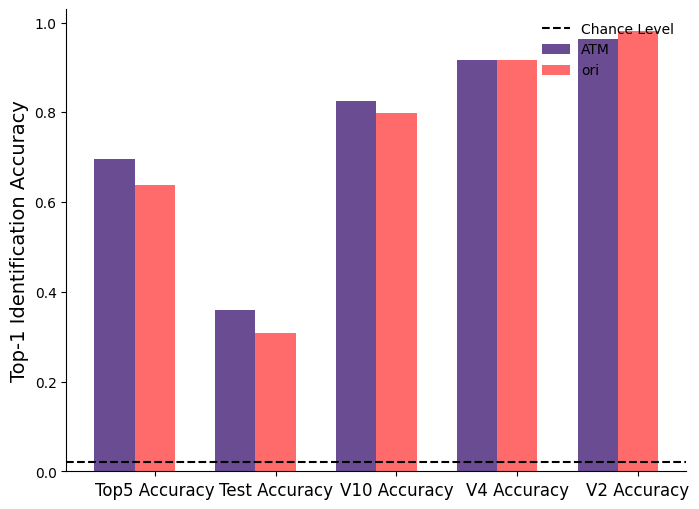

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

output_file_path = "/home/ldy/Workspace/Generation/tab_generation_metric_outputs/subject_averages.csv"

df = pd.read_csv(output_file_path)


# Reorder the DataFrame columns based on the new order of conditions
new_order = ['Method'] + conditions
df = df[new_order]

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Extract methods from the DataFrame
methods = df['Method'].unique()

# Width of the bars
bar_width = 0.15

# Calculate the number of groups and the total width for each group
num_conditions = len(conditions)
group_width = bar_width * (len(methods) + 1)  # Including gap between groups

# Adjust the starting index
index = np.arange(num_conditions) * group_width

# Set colors according to the image provided
colors = ['#6A4C93', '#FF6B6B', '#FFD93D', '#6BCB77']  # Example colors

# Define chance level
chance_level = 0.02  # Example value

# Loop to plot the bars
for i, method in enumerate(methods):
    bar_positions = index + (i * bar_width)
    ax.bar(bar_positions, df.loc[df['Method'] == method, conditions].values.flatten(), 
           bar_width, color=colors[i], label=method)

# Draw chance level line
ax.axhline(y=chance_level, color='black', linestyle='--', label='Chance Level')

# Customize the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ensure legend is only displayed once per method
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', frameon=False)

# Set x-axis labels and ticks
ax.set_xticks(index + (group_width / 2) - (bar_width / 2))
ax.set_xticklabels(conditions, fontsize=12)

# Set y-axis label
ax.set_ylabel('Top-1 Identification Accuracy', fontsize=14)

# Save and show the plot
fig.savefig("../plots/acc_method_Condition.png", dpi=300)
plt.show()